In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
np.set_printoptions(precision=3, suppress=True)

# Bai 1

+ Tìm 10 departments bán được nhiều sản phẩm nhất
+ Vẽ biểu đồ cột và tinh chỉnh hiển thị số liệu sao cho thuận lợi trình bày, người
xem chỉ cần nhìn biểu đồ là nắm được đầy đủ thông tin
(cần có title, số liệu cho từng cột, tên các cột)

In [14]:
file_order = 'data/order_products__prior.csv'
N =  5e5 #500000
order_products = pd.read_csv(file_order, chunksize=N)
chunk = next(order_products)
chunk.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


#### Ý tưởng: 
Ghép cột department_id từ file 'products.csv' theo product_id từ file 'order_product__prior.csv' và đếm số lần xuất hiện của các department_id 

In [15]:
product_info = 'data/products.csv'
product_info = pd.read_csv(product_info)
product_info.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [16]:
file_order = 'data/order_products__prior.csv'
N =  5e5 #500000
order_products = pd.read_csv(file_order, chunksize=N, usecols=['product_id'])
chunk = next(order_products)
chunk

,product_id
0,33120
1,28985
2,9327
3,45918
4,30035
...,...
499995,43631
499996,449
499997,27903
499998,46434


##### Note: function select_depID:
+ Lấy ra thông tin 2 cột 'product_id' và 'department_id' từ products.csv file rồi lưu nó vào biến product_dep_id
+ Dùng hàm merge của pandas để ghép thông tin 'department_id' từ product_dep_id theo product_id (file order_product__prior.csv) rồi lấy ra cột 'department_id' và lưu nó bào biến order_dep
+ Đếm số lần xuất hiện của 'department_id' và lưu nó vào dep_count

In [18]:
    product_dep_id_test = product_info[['product_id','department_id']]
    order_dep_test = pd.merge(chunk,product_dep_id_test,
                        on='product_id')['department_id']
    order_dep_test

0         16
1         16
2         16
3         16
4         16
          ..
499995    13
499996     7
499997    16
499998    17
499999     7
Name: department_id, Length: 500000, dtype: int64

In [19]:
def select_depID(chunk):
    product_dep_id = product_info[['product_id','department_id']]
    order_dep = pd.merge(chunk,product_dep_id,
                        on='product_id')['department_id']
    dep_count = order_dep.value_counts().reset_index()
    dep_count.columns = ['department_id','counts']
    return dep_count

total_dep_count = select_depID(chunk)
total_dep_count.head()

,department_id,counts
0,4,145463
1,16,83779
2,19,44513
3,7,41613
4,1,34773


##### for loop để đếm số lần xuất hiện của department_id các chunk còn lại
+ input các chunk trong order_products(file order_product__prior.csv) vào hàm select_depID để đếm số lần xuất hiện của từng department_id trong chunk đó
+ dùng hàm concat của pandas để nối nó tiếp tục với total_dep_count của chunk đầu tiên

In [20]:
print('before for loop:', total_dep_count.shape)
for i, chunk in enumerate(order_products):
    chunk_count = select_depID(chunk)
    total_dep_count = pd.concat([total_dep_count, chunk_count])
print('after for loop:', total_dep_count.shape)
    

before for loop: (21, 2)
after for loop: (1365, 2)


##### groupby theo 'department_id' và tính tổng số lần xuất hiện của mỗi 'department_id'

In [21]:
total_dep_count = total_dep_count.groupby(['department_id']).sum().reset_index()
print(total_dep_count.head())
print(total_dep_count.tail())

   department_id   counts
0              1  2236432
1              2    36291
2              3  1176787
3              4  9479291
4              5   153696
    department_id   counts
16             17   738666
17             18   423802
18             19  2887550
19             20  1051249
20             21    69145


In [22]:
top10_sel_depID = total_dep_count.nlargest(10, columns='counts')
top10_sel_depID

,department_id,counts
3,4,9479291
15,16,5414016
18,19,2887550
6,7,2690129
0,1,2236432
12,13,1875577
2,3,1176787
14,15,1068058
19,20,1051249
8,9,866627


<!-- #  --> ghép tên của department theo department ID

In [23]:
name_dep = 'data/departments.csv'
name_dep = pd.read_csv(name_dep)
top10_sel_depName = pd.merge(top10_sel_depID, name_dep, 
                             on='department_id')
top10_sel_depName

,department_id,counts,department
0,4,9479291,produce
1,16,5414016,dairy eggs
2,19,2887550,snacks
3,7,2690129,beverages
4,1,2236432,frozen
5,13,1875577,pantry
6,3,1176787,bakery
7,15,1068058,canned goods
8,20,1051249,deli
9,9,866627,dry goods pasta


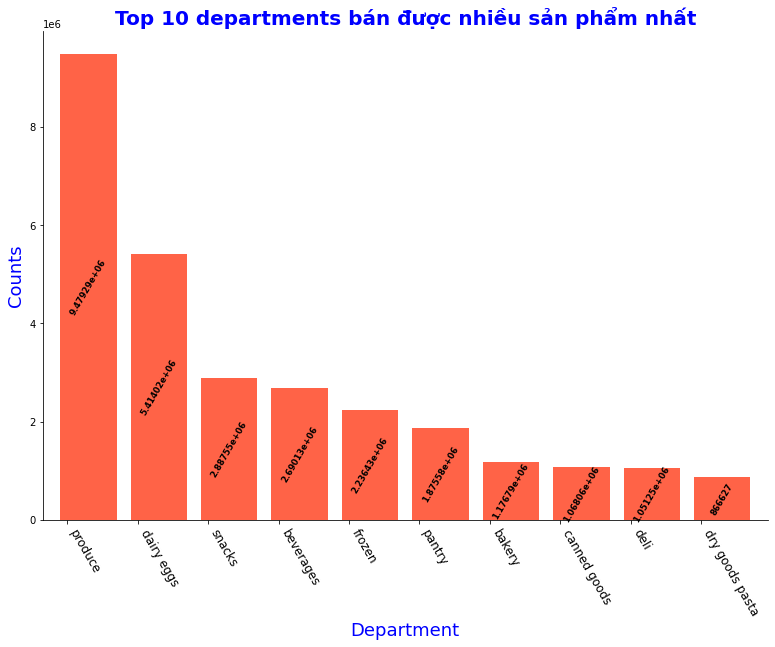

In [24]:
ax = top10_sel_depName.plot.bar(x='department', y='counts', width=0.8, figsize=(13,9), 
                           color='tomato', legend=None, rot=-60)
ax.bar_label(container=ax.containers[0], label_type='center', fontsize=8.5, rotation=60, weight='bold')
ax.set_title('Top 10 departments bán được nhiều sản phẩm nhất',fontsize=20,color='blue',weight='bold')
ax.set_xlabel('Department',fontsize=18,color='blue')
ax.set_ylabel('Counts',fontsize=18,color='blue')
ax.set_xticks(top10_sel_depName.index-0.3)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticklabels(top10_sel_depName['department'], ha='left',fontsize=12)
plt.show()
plt.close('all')

#  Bài 2:
+ Ngoài 10 aisle/department bán được nhiều sản phẩm nhất, tính tổng số sản
phẩm đã bán được của phần còn lại
+ Vẽ biểu đồ tree-map hiển thị kết quả trên

#### Ý tưởng:
+ tính tổng số lần xuất hiện của các department còn lại nhờ và nsmallest+sum và concat nó với top10 sell departmetn ID

In [26]:
# total_dep_count = total_dep_count.sort_values(by=['counts'],
#                                              ascending=False)
other_dep_count = total_dep_count.nsmallest(total_dep_count.shape[0]-10,columns='counts')
sum_other_dep = other_dep_count['counts'].sum()
df_other_dep = pd.DataFrame(data=[[sum_other_dep,'others']], columns=['counts','department'])

total_dep = top10_sel_depName.copy()
total_dep.pop('department_id')
total_dep = pd.concat([total_dep, df_other_dep]).reset_index(drop=True)
total_dep

,counts,department
0,9479291,produce
1,5414016,dairy eggs
2,2887550,snacks
3,2690129,beverages
4,2236432,frozen
5,1875577,pantry
6,1176787,bakery
7,1068058,canned goods
8,1051249,deli
9,866627,dry goods pasta


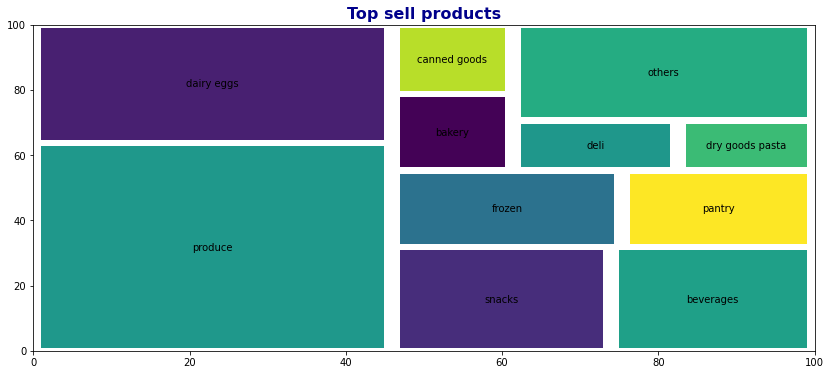

In [27]:
import squarify
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(1,1,1)
ax.set_title('Top sell products', fontsize=16, weight='bold',color='darkblue')
squarify.plot(sizes=total_dep['counts'],label=total_dep['department'],ax=ax,pad=True)
plt.show()